In [1]:
import pandas as pd
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, BatchNormalization, Activation, Dropout
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [2]:
seed_value= 10

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import random
random.seed(seed_value)

import numpy as np
np.random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [3]:
labels = pd.read_csv('trainLabels.csv')

In [4]:
train_images = []
for i in labels.id:
    train_images.append(imread('train/'+str(i)+'.png'))

X_train = np.array(train_images)

In [5]:
animals = sorted(labels.label.unique())
mapping = {}
for i in range(len(animals)):
    mapping[animals[i]] = i

reversed_mapping = {v:k for k,v in mapping.items()}

In [6]:
y_train = labels.label.apply(lambda x: mapping[x])
y_cat_train = to_categorical(y_train,10)

In [7]:
(_, _), (X_test, y_test) = cifar10.load_data()
X_test = X_test/255

In [8]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), 
                 activation='relu', padding = 'same'))
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), 
                 activation='relu', padding = 'same'))
# POOLING LAYER
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(32, 32, 3), 
                 activation='relu', padding = 'same'))
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(32, 32, 3), 
                 activation='relu', padding = 'same'))
# POOLING LAYER
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

## THIRD SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(32, 32, 3),
                 activation='relu', padding = 'same'))
model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(32, 32, 3),
                 activation='relu', padding = 'same'))
# POOLING LAYER
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# BATCH NORMALIZATION
model.add(BatchNormalization())


# FLATTENING IMAGES
model.add(Flatten())

# HIDDEN LAYER
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))

# OUTPUT LAYER
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [10]:
early_stop = EarlyStopping(monitor='val_loss',patience=20)

In [11]:
model.fit(X_train, y_cat_train, epochs=200, validation_data=(X_test, to_categorical(y_test,10)), callbacks=[early_stop])

Epoch 1/200
1563/1563 [==============================] - 239s 152ms/step - loss: 2.2296 - accuracy: 0.3331 - val_loss: 1.5943 - val_accuracy: 0.4994
Epoch 2/200
1563/1563 [==============================] - 240s 154ms/step - loss: 1.4784 - accuracy: 0.5393 - val_loss: 1.2868 - val_accuracy: 0.6147
Epoch 3/200
1563/1563 [==============================] - 242s 155ms/step - loss: 1.2797 - accuracy: 0.6123 - val_loss: 1.1177 - val_accuracy: 0.6765
Epoch 4/200
1563/1563 [==============================] - 241s 154ms/step - loss: 1.1773 - accuracy: 0.6470 - val_loss: 1.0553 - val_accuracy: 0.7045
Epoch 5/200
1563/1563 [==============================] - 241s 154ms/step - loss: 1.1402 - accuracy: 0.6745 - val_loss: 0.9898 - val_accuracy: 0.7310
Epoch 6/200
1563/1563 [==============================] - 242s 155ms/step - loss: 1.0856 - accuracy: 0.6917 - val_loss: 0.9790 - val_accuracy: 0.7287
Epoch 7/200
1563/1563 [==============================] - 241s 154ms/step - loss: 1.0325 - accuracy: 0.7096

Epoch 56/200
1563/1563 [==============================] - 232s 148ms/step - loss: 0.5768 - accuracy: 0.8594 - val_loss: 0.6440 - val_accuracy: 0.8463
Epoch 57/200
1563/1563 [==============================] - 241s 154ms/step - loss: 0.5698 - accuracy: 0.8626 - val_loss: 0.6433 - val_accuracy: 0.8471
Epoch 58/200
1563/1563 [==============================] - 241s 154ms/step - loss: 0.5709 - accuracy: 0.8639 - val_loss: 0.6423 - val_accuracy: 0.8464
Epoch 59/200
1563/1563 [==============================] - 241s 154ms/step - loss: 0.5648 - accuracy: 0.8628 - val_loss: 0.6405 - val_accuracy: 0.8477
Epoch 60/200
1563/1563 [==============================] - 242s 155ms/step - loss: 0.5732 - accuracy: 0.8630 - val_loss: 0.6404 - val_accuracy: 0.8473
Epoch 61/200
1563/1563 [==============================] - 243s 155ms/step - loss: 0.5687 - accuracy: 0.8648 - val_loss: 0.6503 - val_accuracy: 0.8468
Epoch 62/200
1563/1563 [==============================] - 241s 154ms/step - loss: 0.5719 - accuracy:

<AxesSubplot:>

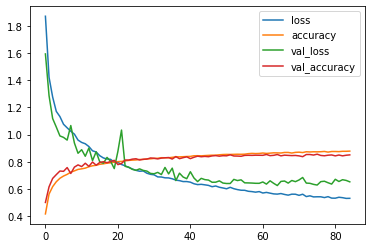

In [12]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [13]:
predictions = model.predict_classes(X_test)

C:\Users\Mateusz\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [14]:
print(classification_report(y_test,predictions))
confusion_matrix(y_test,predictions)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.93      0.93      0.93      1000
           2       0.80      0.76      0.78      1000
           3       0.79      0.66      0.72      1000
           4       0.83      0.84      0.84      1000
           5       0.76      0.80      0.78      1000
           6       0.86      0.91      0.89      1000
           7       0.88      0.90      0.89      1000
           8       0.88      0.94      0.91      1000
           9       0.88      0.92      0.90      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



array([[840,  11,  26,  17,   8,   1,   4,   5,  58,  30],
       [  4, 929,   1,   3,   1,   2,   1,   0,  12,  47],
       [ 50,   0, 758,  18,  46,  46,  45,  20,  12,   5],
       [ 18,   4,  48, 663,  43, 133,  44,  27,   8,  12],
       [ 10,   2,  35,  24, 843,  18,  31,  28,   8,   1],
       [  9,   2,  29,  76,  32, 802,  10,  31,   4,   5],
       [  5,   2,  26,  19,  15,  12, 908,   4,   7,   2],
       [ 11,   2,  14,  14,  21,  31,   2, 897,   2,   6],
       [ 21,  11,   6,   5,   3,   1,   3,   0, 937,  13],
       [ 11,  41,   0,   3,   0,   5,   3,   2,  12, 923]], dtype=int64)

<AxesSubplot:>

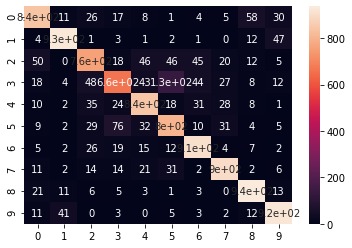

In [15]:
sns.heatmap(confusion_matrix(y_test,predictions), annot = True)

In [17]:
test_images = []
for i in range(1,300_001):
    test_images.append(imread('test/'+str(i)+'.png'))
X_test = np.array(test_images)
predictions = model.predict_classes(X_test)

In [18]:
prediction_labels = [reversed_mapping[x] for x in predictions]
predictions_df = pd.DataFrame({'id':range(1,len(prediction_labels)+1), 'label':prediction_labels})
predictions_df.to_csv("kaggle_final_new_2.csv", index = None)

In [20]:
predictions2_df = pd.DataFrame(model.predict(X_test))
predictions2_df.to_csv("kaggle_final_new_2_classes.csv", index = None)